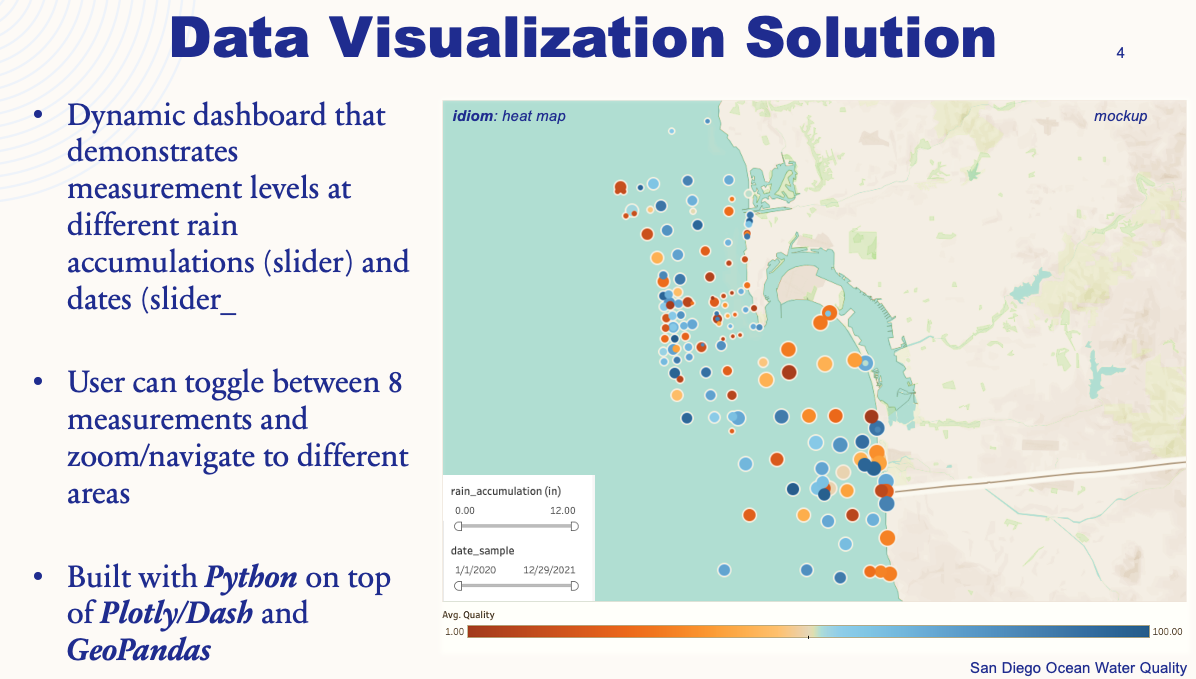

## Water Quality - Ocean Monitoring Program

Ocean water quality data, including bacteriological sampling for fecal indicator bacteria as well as physical, chemical, and biological parameters observed throughout the region. Samples are collected as part of The City’s Ocean Monitoring Program, which monitors the effects of treated wastewater effluent on the local marine environment. The OMP extends 340 square miles total from northern San Diego to northern Baja California, Mexico, and encompasses the shoreline seaward approximately 10 miles, to depths of over 500 meters.

[source](https://data.sandiego.gov/datasets/monitoring-ocean-water-quality/)

Data source: https://data.sandiego.gov/datasets/monitoring-ocean-water-quality/

GeoPandas - plot lat/lon: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972 

In [1]:
# %pip install meteostat

In [2]:
# %pip install plotly

In [3]:
# %pip install dash

In [4]:
# %pip install jupyter-dash

In [5]:
import numpy as np
import datetime as dt
import meteostat as ms

from dash import Dash, html, dcc, Input, Output
from jupyter_dash import JupyterDash
import plotly.express as px
import plotly.graph_objects as go

from urllib.request import urlopen
import json
import webbrowser

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import geopandas as gpd
# from shapely.geometry import Point, Polygon, mapping

# water quality data

In [6]:
data_dict = pd.read_csv("./data/water_quality_dictionary_datasd.csv")
data_dict

,field,description,possible_values
0,sample,Unique sample ID,NaN
1,station,Unique location ID where sample was collected....,NaN
2,depth_m,Depth in meters,NaN
3,date_sample,Date sample was collected,NaN
4,time,Time sample was collected,NaN
5,project,Outfall region where sample was collected,PLOO (PL): Point Loma Ocean Outfall; SBOO: Sou...
6,parameter,Factor being recorded,fluorometry; DENSITY; DO; ENTERO; FECAL; OG; P...
7,qualifier,Qualifier for value,"<, >, e, LA, ND, NS"
8,value,Result value,NaN
9,units,Units of result value,%; C; CFU/100 ml; mg/L; pH; ppt; sigma-t; ug/L


In [7]:
data_dict.iloc[6,2]

'fluorometry; DENSITY; DO; ENTERO; FECAL; OG; PH; SALINITY; SUSO; TEMP; TOTAL; pct_light'

In [8]:
locs = pd.read_csv("./data/reference_stations_water_quality.csv")
locs

,station,lat,long
0,I25,32.56117,-117.14800
1,I26,32.57450,-117.14700
2,S10,32.54330,-117.12500
3,S11,32.56130,-117.13200
4,S4,32.53530,-117.12500
...,...,...,...
152,B6,32.82833,-117.29250
153,A3,32.65167,-117.29717
154,A4,32.68450,-117.30700
155,A15,32.66833,-117.28167


In [9]:
data = pd.read_csv("./data/water_quality_2020_2021_datasd.csv")
data

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units
0,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,ENTERO,e,220.0,CFU/100 mL
1,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,TOTAL,NR,NaN,CFU/100 mL
2,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,FECAL,NR,NaN,CFU/100 mL
3,2001018680,S4,NaN,2020-01-01,NaN,SBOO,TOTAL,NS,NaN,CFU/100 mL
4,2001018680,S4,NaN,2020-01-01,NaN,SBOO,FECAL,NS,NaN,CFU/100 mL
...,...,...,...,...,...,...,...,...,...,...
70158,2112291249,D8-B,NaN,2021-12-29,9:36:00 PST,PLOO,ENTERO,e,14.0,CFU/100 mL
70159,2112291249,D8-B,NaN,2021-12-29,9:36:00 PST,PLOO,TOTAL,<,200.0,CFU/100 mL
70160,2112291250,D9,NaN,2021-12-29,9:22:00 PST,PLOO,FECAL,<,2.0,CFU/100 mL
70161,2112291250,D9,NaN,2021-12-29,9:22:00 PST,PLOO,ENTERO,e,4.0,CFU/100 mL


In [10]:
data.nunique()

sample         15333
station          104
depth_m           16
date_sample      369
time             383
project            2
parameter         10
qualifier          7
value           8190
units              8
dtype: int64

In [11]:
# there are more stations than in the measurement
# but thankfully every station with a measurement is accounted for
len(set(data['station']).difference(set(locs['station'])))

0

In [12]:
pd.to_datetime(data['date_sample']).min()

Timestamp('2020-01-01 00:00:00')

In [13]:
pd.to_datetime(data['date_sample']).max()

Timestamp('2021-12-29 00:00:00')

In [14]:
data = pd.merge(
    data,
    locs,
    how='left',
    left_on='station',
    right_on='station'
)

data

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units,lat,long
0,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,ENTERO,e,220.0,CFU/100 mL,32.56130,-117.13200
1,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,TOTAL,NR,NaN,CFU/100 mL,32.56130,-117.13200
2,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,FECAL,NR,NaN,CFU/100 mL,32.56130,-117.13200
3,2001018680,S4,NaN,2020-01-01,NaN,SBOO,TOTAL,NS,NaN,CFU/100 mL,32.53530,-117.12500
4,2001018680,S4,NaN,2020-01-01,NaN,SBOO,FECAL,NS,NaN,CFU/100 mL,32.53530,-117.12500
...,...,...,...,...,...,...,...,...,...,...,...,...
70158,2112291249,D8-B,NaN,2021-12-29,9:36:00 PST,PLOO,ENTERO,e,14.0,CFU/100 mL,32.73945,-117.25499
70159,2112291249,D8-B,NaN,2021-12-29,9:36:00 PST,PLOO,TOTAL,<,200.0,CFU/100 mL,32.73945,-117.25499
70160,2112291250,D9,NaN,2021-12-29,9:22:00 PST,PLOO,FECAL,<,2.0,CFU/100 mL,32.74667,-117.25402
70161,2112291250,D9,NaN,2021-12-29,9:22:00 PST,PLOO,ENTERO,e,4.0,CFU/100 mL,32.74667,-117.25402


In [15]:
# pretty balanced measurements
data['parameter'].value_counts()

ENTERO         8680
FECAL          7489
TOTAL          7479
TEMP           6645
DO             6645
PH             6645
CHLOROPHYLL    6645
XMS            6645
SALINITY       6645
DENSITY        6645
Name: parameter, dtype: int64

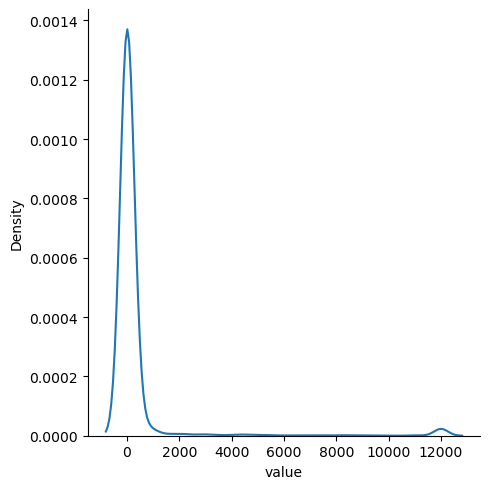

In [16]:
sns.displot(data[data['parameter']=='ENTERO']['value'], kind="kde");

# Get Precipitation data
- utilizes meteostat library which sources data from NOAA

In [17]:
# lat lon for nearby area
crown_point = (32.786670, -117.238620)

# start = dt(2020, 1, 1)
# end = dt(2021, 12, 29)


# going to use rolling sum so want 7 days prior
start = pd.to_datetime(data['date_sample'].min()).to_pydatetime() - dt.timedelta(days=7)
end = pd.to_datetime(data['date_sample'].max()).to_pydatetime()

# get closest weather station
diego = ms.Point(crown_point[0], crown_point[1], 70)

# call the api
rain_data = ms.Daily(diego, start, end)
rain_data = rain_data.fetch()['prcp']

# move timestamp into column
rain_data = rain_data.reset_index()

# convert datetype for joining
rain_data['time'] = rain_data['time'].astype(str)

rain_data = rain_data.rename(columns={'time': 'date', 'prcp': 'prcp_mm'})
rain_data['week_prcp_mm'] = rain_data['prcp_mm'].rolling(7).sum()
# rolling function has some unexpected behavior that yields negative numbers very close to zero
rain_data['week_prcp_mm'] = np.around(rain_data['week_prcp_mm'], decimals=2)
rain_data = rain_data.dropna().reset_index(drop=True)
rain_data

,date,prcp_mm,week_prcp_mm
0,2019-12-31,0.0,32.5
1,2020-01-01,0.0,32.5
2,2020-01-02,0.0,0.0
3,2020-01-03,0.0,0.0
4,2020-01-04,0.0,0.0
...,...,...,...
725,2021-12-25,4.6,25.4
726,2021-12-26,2.0,27.4
727,2021-12-27,1.3,28.7
728,2021-12-28,2.0,30.7


min:  0.0
max:  29.5


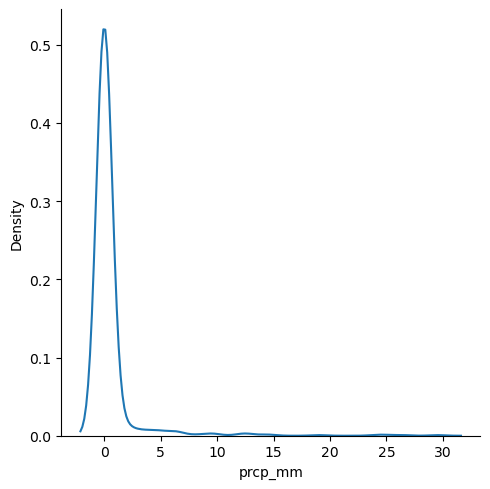

In [18]:
print('min: ', rain_data['prcp_mm'].min())
print('max: ', rain_data['prcp_mm'].max())

sns.displot(rain_data['prcp_mm'], kind='kde');

min:  -0.0
max:  91.2


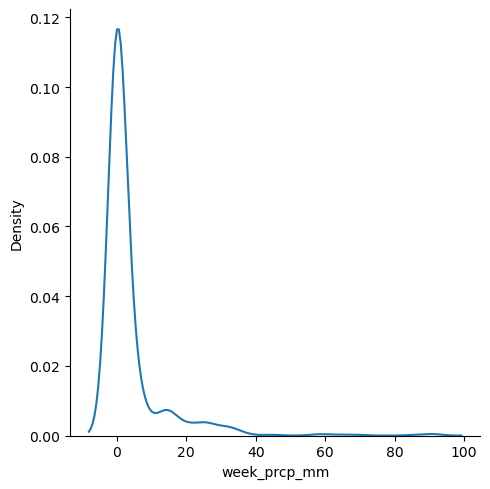

In [19]:
print('min: ', rain_data['week_prcp_mm'].min())
print('max: ', rain_data['week_prcp_mm'].max())

sns.displot(rain_data['week_prcp_mm'], kind='kde');

In [20]:
# bring rain data
data = pd.merge(
    data,
    rain_data,
    how='left',
    left_on='date_sample',
    right_on='date'
)

# delete superfluous column
data = data.drop(['date'], axis=1)
data

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units,lat,long,prcp_mm,week_prcp_mm
0,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,ENTERO,e,220.0,CFU/100 mL,32.56130,-117.13200,0.0,32.5
1,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,TOTAL,NR,NaN,CFU/100 mL,32.56130,-117.13200,0.0,32.5
2,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,FECAL,NR,NaN,CFU/100 mL,32.56130,-117.13200,0.0,32.5
3,2001018680,S4,NaN,2020-01-01,NaN,SBOO,TOTAL,NS,NaN,CFU/100 mL,32.53530,-117.12500,0.0,32.5
4,2001018680,S4,NaN,2020-01-01,NaN,SBOO,FECAL,NS,NaN,CFU/100 mL,32.53530,-117.12500,0.0,32.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70158,2112291249,D8-B,NaN,2021-12-29,9:36:00 PST,PLOO,ENTERO,e,14.0,CFU/100 mL,32.73945,-117.25499,6.9,37.6
70159,2112291249,D8-B,NaN,2021-12-29,9:36:00 PST,PLOO,TOTAL,<,200.0,CFU/100 mL,32.73945,-117.25499,6.9,37.6
70160,2112291250,D9,NaN,2021-12-29,9:22:00 PST,PLOO,FECAL,<,2.0,CFU/100 mL,32.74667,-117.25402,6.9,37.6
70161,2112291250,D9,NaN,2021-12-29,9:22:00 PST,PLOO,ENTERO,e,4.0,CFU/100 mL,32.74667,-117.25402,6.9,37.6


# Build Dashboard
create a scatter/point plot of the measurement locations

[money documentation](https://plotly.com/python/mapbox-layers/?_gl=1*1qyo6lu*_ga*OTMzNzQ4MDQxLjE2NzY2MjA3MjY.*_ga_6G7EE0JNSC*MTY3OTU0MzIxMC4yNS4xLjE2Nzk1NDQ4NzIuMC4wLjA.)

In [21]:
features = sorted(data['parameter'].unique())

for feat in features:
    print(f"feature_description['{feat}'] = ''")

feature_description['CHLOROPHYLL'] = ''
feature_description['DENSITY'] = ''
feature_description['DO'] = ''
feature_description['ENTERO'] = ''
feature_description['FECAL'] = ''
feature_description['PH'] = ''
feature_description['SALINITY'] = ''
feature_description['TEMP'] = ''
feature_description['TOTAL'] = ''
feature_description['XMS'] = ''


In [22]:
# feature_description = {feat:'' for feat in features}

feature_description = {}
feature_description['CHLOROPHYLL'] = 'indicator for photosynthetic plankton'
feature_description['DENSITY'] = 'density of coliform (bacteria)'
feature_description['DO'] = 'dissolved oxygen'
feature_description['ENTERO'] = 'enteroccus (bacteria), indicator of sewage'
feature_description['FECAL'] = 'fecal matter in water, indicator of sewage'
feature_description['PH'] = 'acidity / basicness of water'
feature_description['SALINITY'] = 'disolved salt content'
feature_description['TEMP'] = 'water temperature in degrees Celsius'
feature_description['TOTAL'] = 'unclear'
feature_description['XMS'] = 'transmissivity of light in water'

feature_description

{'CHLOROPHYLL': 'indicator for photosynthetic plankton',
 'DENSITY': 'density of coliform (bacteria)',
 'DO': 'dissolved oxygen',
 'ENTERO': 'enteroccus (bacteria), indicator of sewage',
 'FECAL': 'fecal matter in water, indicator of sewage',
 'PH': 'acidity / basicness of water',
 'SALINITY': 'disolved salt content',
 'TEMP': 'water temperature in degrees Celsius',
 'TOTAL': 'unclear',
 'XMS': 'transmissivity of light in water'}

help with these descriptions from 2015 report by this same project: 
https://www.ibwc.gov/Files/2015_SBOO_AnnualReceivingWatersMonitoringAssessmentReport.pdf
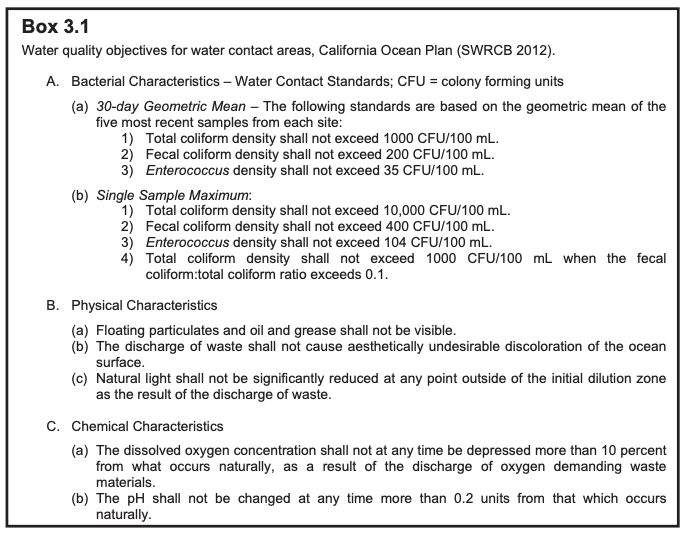

In [23]:
# create the number of measurements for a site, specific to each parameter
measurement_counts = data.groupby(['station', 'parameter'])[['sample']].nunique().reset_index()
measurement_counts = measurement_counts.rename(columns={'sample': 'n_measurements'})
measurement_counts

,station,parameter,n_measurements
0,A1,CHLOROPHYLL,314
1,A1,DENSITY,314
2,A1,DO,314
3,A1,ENTERO,315
4,A1,FECAL,315
...,...,...,...
787,S8,FECAL,113
788,S8,TOTAL,113
789,S9,ENTERO,108
790,S9,FECAL,106


In [24]:
# bring back to original dataframe
data = pd.merge(data,
        measurement_counts,
         how='left',
         left_on=['station', 'parameter'],
         right_on=['station', 'parameter']
        )

data

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units,lat,long,prcp_mm,week_prcp_mm,n_measurements
0,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,ENTERO,e,220.0,CFU/100 mL,32.56130,-117.13200,0.0,32.5,147
1,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,TOTAL,NR,NaN,CFU/100 mL,32.56130,-117.13200,0.0,32.5,136
2,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,FECAL,NR,NaN,CFU/100 mL,32.56130,-117.13200,0.0,32.5,138
3,2001018680,S4,NaN,2020-01-01,NaN,SBOO,TOTAL,NS,NaN,CFU/100 mL,32.53530,-117.12500,0.0,32.5,155
4,2001018680,S4,NaN,2020-01-01,NaN,SBOO,FECAL,NS,NaN,CFU/100 mL,32.53530,-117.12500,0.0,32.5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70158,2112291249,D8-B,NaN,2021-12-29,9:36:00 PST,PLOO,ENTERO,e,14.0,CFU/100 mL,32.73945,-117.25499,6.9,37.6,98
70159,2112291249,D8-B,NaN,2021-12-29,9:36:00 PST,PLOO,TOTAL,<,200.0,CFU/100 mL,32.73945,-117.25499,6.9,37.6,95
70160,2112291250,D9,NaN,2021-12-29,9:22:00 PST,PLOO,FECAL,<,2.0,CFU/100 mL,32.74667,-117.25402,6.9,37.6,105
70161,2112291250,D9,NaN,2021-12-29,9:22:00 PST,PLOO,ENTERO,e,4.0,CFU/100 mL,32.74667,-117.25402,6.9,37.6,106


In [25]:
# create str labels for tooltip
data['unit_values'] = data['value'].astype(str) + ' ' + data['units']

In [26]:
# create str labels for measurement scale
data['unit_labels'] = data['parameter'] + ' ' + data['units']

In [27]:
# help(px.colors.sequential)
# #help(px.colors.diverging)

In [28]:
# px.colors.diverging.swatches()

In [29]:
# px.colors.sequential.swatches()

In [30]:
# help(px.scatter_mapbox)

# now move into dash and add filter for parameter

In [31]:
# SOLUTION

#app = Dash(__name__) #if wanted to build in python ide
app = JupyterDash(__name__)


###
# configure visualization
###
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

feature_description = {}
feature_description['CHLOROPHYLL'] = 'indicator for photosynthetic plankton'
feature_description['DENSITY'] = 'density of coliform (bacteria)'
feature_description['DO'] = 'dissolved oxygen'
feature_description['ENTERO'] = 'enteroccus (bacteria), indicator of sewage'
feature_description['FECAL'] = 'fecal matter in water, indicator of sewage'
feature_description['PH'] = 'acidity / basicness of water'
feature_description['SALINITY'] = 'disolved salt content'
feature_description['TEMP'] = 'water temperature in degrees Celsius'
feature_description['TOTAL'] = 'unclear'
feature_description['XMS'] = 'transmissivity of light in water'


###
# SEND TO SERVER
###
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1( # header1
        children='Ocean Water Quality',
        style={
            'textAlign': 'center',
            'color': colors['text'],
        }
    ),
    # subtitle
    html.Div(# subtitle
        children='''
        San Diego Coast from 2020-2021 \n(select parameter from dropdown and hover over station to view details).
        ''',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    
    #html.Div([
    
    dcc.Dropdown(
        sorted(data['parameter'].unique()),
        'TEMP', # this should be the default starting measure
        id='parameter-dropdown',
        style={
            'textAlign': 'center',
            'color': colors['text'],
            'position': 'relative',
            #'width': '80%',
            #'display': 'inline-block',
#             'top': '50%',
#             'left': '50%',
#             'transform': 'translate(-50%, -50%)',
#             'height': '50%',
            'width': '80%',
            'z-index': '1',
            'margin-left': 'auto',
            'margin-right': 'auto',
        }
    ),
    #]),
    
    html.Div([
        dcc.Graph(id='sd-county',
              style={
#                   #'display': 'inline-block',
#                   'vertical-align': 'center',
#                   'width': '100%',
#                   'height': '500px', # inflexible solution, want it to take up remainder of screen space
              'position': 'absolute',
              'top': '60%',
              'left': '50%',
              'transform': 'translate(-50%, -50%)',
              #'height': '60%',
              'height': '60vh',
              'width': '80%',
              }
    )]),
        
        html.Div([
        html.Br(),
        html.Label('Weekly Rain Accumulation (mm)', 
                   style={
                       'color': colors['text'],
                       'textAlign': 'center',
                   }),
        dcc.Slider(
            0, # minimum
            np.ceil(data['week_prcp_mm'].max()), # maximum
            step=None,
            id='rain--slider',
            value=0, # start at no rain
            marks={str(num): str(num) for num in np.ceil(data['week_prcp_mm']).unique().astype(int)},# dictionary comprehension 
            vertical=False, #verticalHeight=600,
            dots=False,
            tooltip={'placement': 'bottom', 'always_visible': True}
        )
]),

    
    # subtitle
    html.Div(# data description
        children='''
        include a description of the data
        ''',
        id='describe-param',
        style={
            'textAlign': 'center',
            'color': colors['text'],
            'z-index': '2'
        }
    ),

    
])


###
# first chart: choropleth
###

def create_scatter(data):
    
    fig = px.scatter_mapbox(data, 
                            lat="lat", 
                            lon="long", 
                            hover_name="station", 
                            hover_data={"value":False, "unit_values":True, "n_measurements":True, "lat":False, "long":False},
                            labels={'value':list(data['unit_labels'])[0],"n_measurements":"# of readings", "unit_values": "reading"},
                            color="value",
                            #color_continuous_scale="haline", # I think this is a good one
                            color_continuous_scale="deep", # possibly better
                            size="n_measurements",
                            size_max=10,
                            opacity=0.8,
                            zoom=8, 
                            height=300,
                           )
    
    fig.update_layout(
        #title='San Diego Coast',
        #autosize=True, hovermode='closest',
        mapbox_style="open-street-map",
        #mapbox_style="carto-positron",
        #mapbox_style="carto-darkmatter",
        #mapbox_style="stamen-terrain",
        #mapbox_style="stamen-toner",
        #mapbox_style="stamen-watercolor",
        margin={"r":0,"t":0,"l":0,"b":0},
        #mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90}, # plotly version 5.11 needed
    )
    

    fig.update_geos(
        fitbounds='locations', visible=True, # initializes the zoom to just our locations
                   )
    #fig.show()
    return fig

###
# CALLBACK for Scatter mapbox #
###
@app.callback(
    Output('sd-county', 'figure'),
    Input('parameter-dropdown', 'value'),
    Input('rain--slider', 'value'),
)
def update_scatter(selected_parameter, rain_value):
    
    # filtered on parameter
    filtered_data = data[data['parameter']==selected_parameter]
    # and filtered on rain amount within 1 mm
    filtered_data = filtered_data[filtered_data['week_prcp_mm'].between(rain_value-1, rain_value)]
    return create_scatter(filtered_data)

###
# CALLBACK for data description
###
@app.callback(
    Output('describe-param', 'children'),
    Input('parameter-dropdown', 'value')
)

def update_description(value):
    description = feature_description[value]
    return f'{value}: {description}'


if __name__ == '__main__':
    #app.run(debug=True)
    # supposedly deprecated
    app.run_server(mode='jupyterlab', 
                   host="localhost",
                   port=8051,
                   debug=False, # change to False on deploy
                   dev_tools_hot_reload=True # changes should occur in real time
                  ) # click the link to view the chart
    
# will automatically launch in new tab
webbrowser.open("http://localhost:8051/")

Dash is running on http://localhost:8051/



 * Running on http://localhost:8051
Press CTRL+C to quit
127.0.0.1 - - [24/Mar/2023 02:05:00] "GET /_alive_730ae57f-ea53-4c78-8a7d-6f4707e609f4 HTTP/1.1" 200 -


True

In [32]:
help(dcc.Slider)

Help on class Slider in module dash.dcc.Slider:

class Slider(dash.development.base_component.Component)
 |  Slider(min=undefined, max=undefined, step=undefined, marks=undefined, value=undefined, drag_value=undefined, disabled=undefined, dots=undefined, included=undefined, tooltip=undefined, updatemode=undefined, vertical=undefined, verticalHeight=undefined, className=undefined, id=undefined, loading_state=undefined, persistence=undefined, persisted_props=undefined, persistence_type=undefined, **kwargs)
 |  
 |  A Slider component.
 |  A slider component with a single handle.
 |  
 |  Keyword arguments:
 |  
 |  - min (number; optional):
 |      Minimum allowed value of the slider.
 |  
 |  - max (number; optional):
 |      Maximum allowed value of the slider.
 |  
 |  - step (number; optional):
 |      Value by which increments or decrements are made.
 |  
 |  - marks (dict; optional):
 |      Marks on the slider. The key determines the position (a number),
 |      and the value deter

In [33]:
app._callback_list

[{'output': 'sd-county.figure',
  'inputs': [{'id': 'parameter-dropdown', 'property': 'value'},
   {'id': 'rain--slider', 'property': 'value'}],
  'state': [],
  'clientside_function': None,
  'prevent_initial_call': False,
  'long': None},
 {'output': 'describe-param.children',
  'inputs': [{'id': 'parameter-dropdown', 'property': 'value'}],
  'state': [],
  'clientside_function': None,
  'prevent_initial_call': False,
  'long': None}]

127.0.0.1 - - [24/Mar/2023 02:05:00] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2023 02:05:00] "GET /_dash-component-suites/dash/deps/react@16.v2_9_1m1679089843.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2023 02:05:00] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_9_1m1679089843.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2023 02:05:00] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_9_1m1679089843.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2023 02:05:00] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2023 02:05:00] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2023 02:05:00] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [24/Mar/2023 02:05:00] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [24/Mar/2023 02:05:00] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2023 02:05:00] "GET /_dash-component-suites/dash/dcc/async